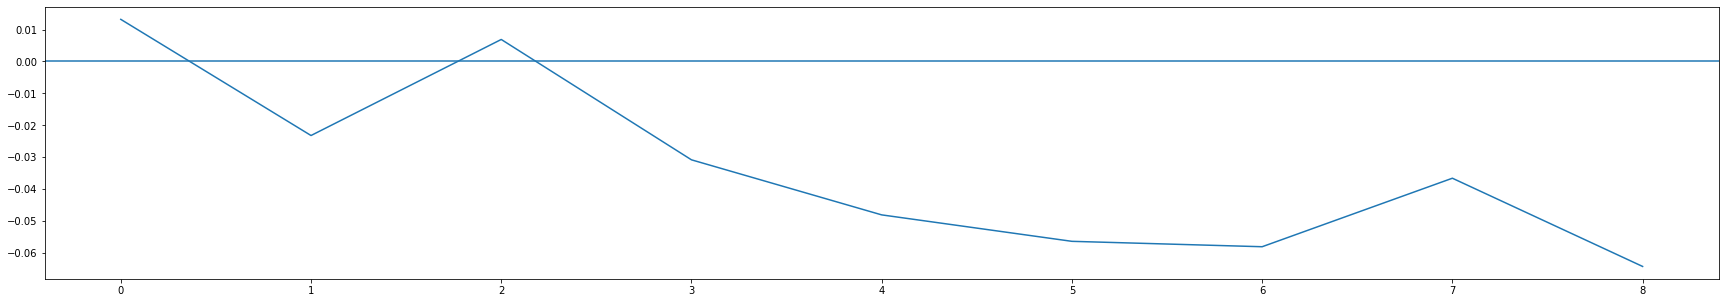

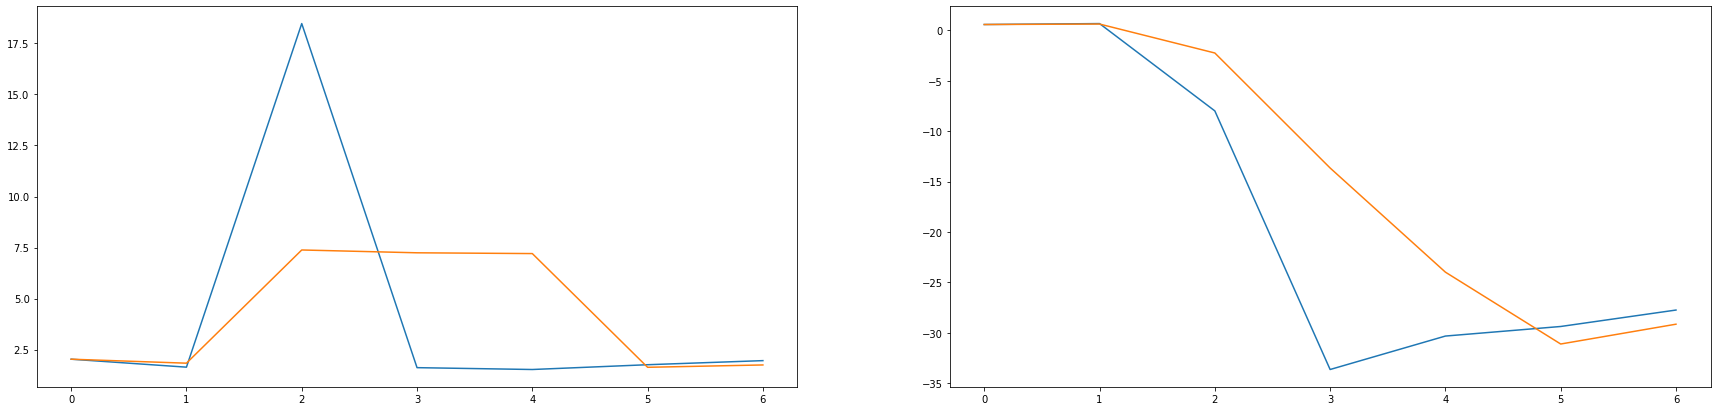

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython.display import clear_output
import time



file1 = open("logs/rewards_log.txt")
text = file1.read()
file1.close()

rewards = [float(x) for x in text.split("\n")[0:] if x != "" and not np.isnan(float(x))]


fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(rewards)
ax.axhline(y=0)
#s = [0]
#for i in rewards:
#    z = s[-1]+i
#    s.append(z)
#ax.plot(s)
s=10
#s2 = 30000

file1 = open("logs/loss_log.txt")
text = file1.read()
file1.close()

x = [float(x) for x in text.split("\n")[0:] if x != "" and x != float(x)!= 0 and float(x)<1000]
weights = [m+1 for m in range(s)]
x1=[np.average(x[i-s+1:i+1], weights = None)for i in tqdm(range(0,len(x)))]
#x2=[np.average(x[max(0,i-s2+1):i+1])for i in tqdm(range(s,len(x)))]

file1 = open("logs/qv_log.txt")
text = file1.read()
file1.close()

y = [float(x) for x in text.split("\n")[0:] if x != ""  and x != float(x)!= 0]
weights = [m+1 for m in range(s)]
y1=[np.average(y[i-s+1:i+1], weights = None)for i in tqdm(range(0,len(y)))]

clear_output()
fig, ax = plt.subplots(1,2,figsize=(30,7))
#ax[0].set_ylim(0,0.01)
ax[0].plot(x)
ax[0].plot(x1)
#ax[0].plot(x2)
#ax[1].set_ylim(1,3)
ax[1].plot(y)
ax[1].plot(y1)
